In [308]:
import healpy as hp
import numpy as np
import pylab as plt
import h5py
import ephem

from coord_utils import compute_w, polar_to_cartesian, phase_vector, generate_phase_vector, skycoord_to_ephem, sky2pix, pix2sky
from ant_array2 import RadioArray
from allsky_viewer import AllSkyViewer, generate_skycat

from astropy.coordinates import SkyCoord, Angle
from astropy.time import Time

In [360]:
filename_data = 'test_data_blink/eda2/20200209/chan_204_20200209T034646_vis_real.fits'
filename_ant  = 'test_data/eda_antenna_locations_v2.h5'
# Setup array
f_mhz = np.array([159.3750])
lat = '-26:42:11:95'
lon = '116:40:14.93'
elev = 500
t = Time('2020-02-09T03:46:46.0', format='isot')
sun = ephem.Sun()

# Initialize EDA array
eda = RadioArray(lat, lon, elev, f_mhz, filename_ant, t0=t.datetime, verbose=True, phase_center=sun)
eda.load_fits_data(filename_data)

eda.plot_corr_matrix()

Time: 2020/2/9 03:46:46
Sun 	RA / DEC:  (21:29:01.23, -14:51:39.7) 
	ALT / AZ:  (74:49:40.3, 40:43:47.7)
ZENITH: (20:47:08.87, -26:46:33.5)
HA, D: (-0.18270382264997043, -14:51:39.7)


/Users/dancpr/Data/eda_post_x/ant_array2.py:232: RuntimeWarning: divide by zero encountered in log
  data = np.log(np.abs(self.data)) if log else np.abs(self.data)


/Users/dancpr/Data/eda_post_x/ant_array2.py:213: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)
/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/476854577.py:14: RuntimeWarning: invalid value encountered in log
  asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)


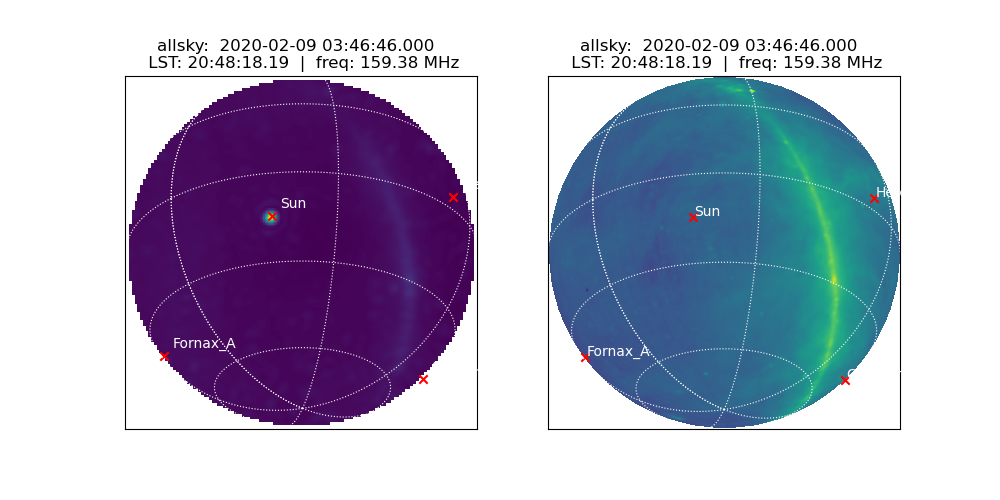

In [361]:
img = eda.make_image()
gsm = eda.generate_gsm()

asv = AllSkyViewer(observer=eda, ts=t, f_mhz=f_mhz[0], n_pix=128)
skycat = generate_skycat(asv.observer)
asv.load_skycat(skycat)

plt.figure(figsize=(10, 5))
asv.plot(img, subplot_id=(1,2,1), overlay_srcs=True)


asv = AllSkyViewer(observer=eda, ts=t, f_mhz=f_mhz[0], n_pix=800)
asv.load_skycat(skycat)
asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)

In [357]:
asv.skycat['Virgo_A']

{'Virgo_A': <SkyCoord (ICRS): (ra, dec) in deg
     (187.70416667, 12.39111111)>,
 'Hydra_A': <SkyCoord (ICRS): (ra, dec) in deg
     (139.52333333, -12.09555556)>,
 'Centaurus_A': <SkyCoord (ICRS): (ra, dec) in deg
     (201.365, -43.01916667)>,
 'Pictor_A': <SkyCoord (ICRS): (ra, dec) in deg
     (79.95717083, -45.77884722)>,
 'Hercules_A': <SkyCoord (ICRS): (ra, dec) in deg
     (252.78395833, 4.99258889)>,
 'Fornax_A': <SkyCoord (ICRS): (ra, dec) in deg
     (50.67375, -37.20833333)>,
 'Sun': <SkyCoord (ICRS): (ra, dec) in deg
     (13.99143766, 5.98530449)>,
 'Moon': <SkyCoord (ICRS): (ra, dec) in deg
     (148.47495444, 17.74705989)>}

In [365]:
eda.beamform(asv.skycat['Sun']) / eda.beamform(asv.skycat['Fornax_A']) 

Time: 2020/2/9 03:46:46
 	RA / DEC:  (21:30:05.03, -14:46:31.4) 
	ALT / AZ:  (74:36:14.2, 41:18:28.2)
ZENITH: (20:47:08.87, -26:46:33.5)
HA, D: (-0.18734348282430613, -14:46:31.4)
Time: 2020/2/9 03:46:46
 	RA / DEC:  (3:23:27.15, -37:08:36.3) 
	ALT / AZ:  (9:26:46.4, 127:01:24.7)
ZENITH: (20:47:08.87, -26:46:33.5)
HA, D: (4.553980246736856, -37:08:36.3)


7.824921816806698

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/1292982430.py:4: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hmap), coord='G')


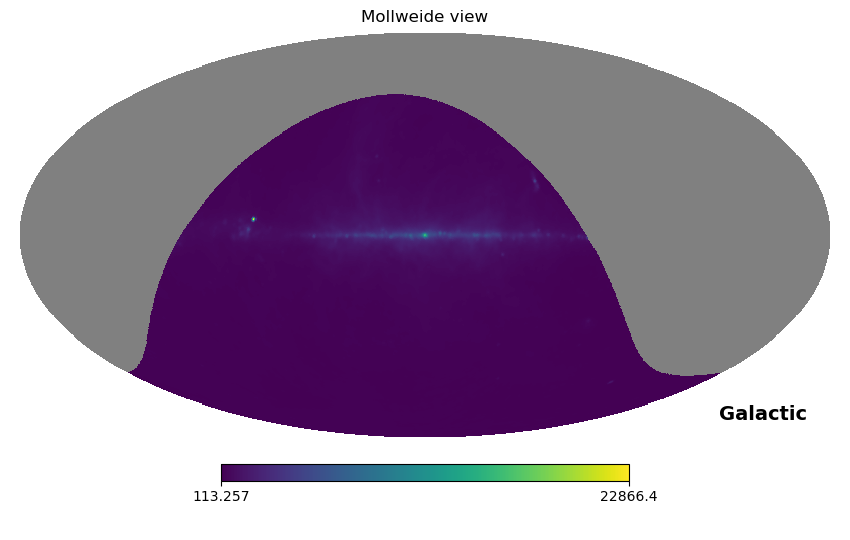

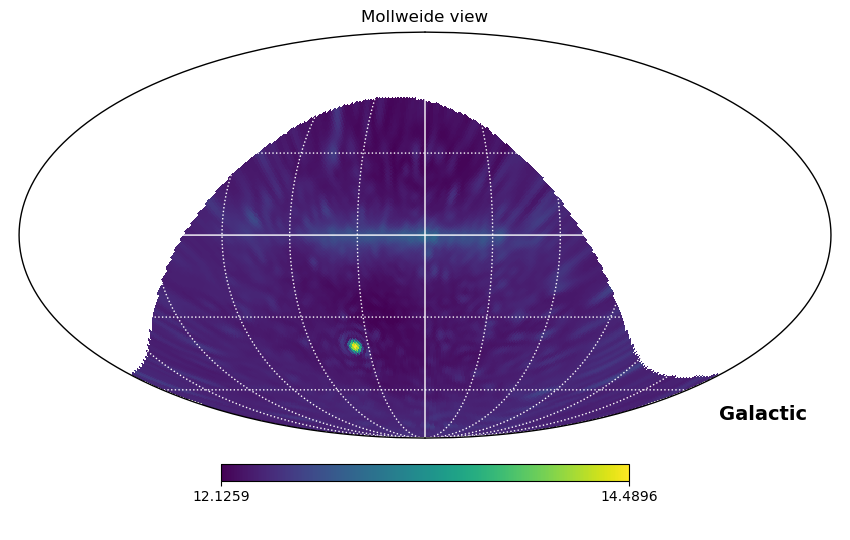

In [325]:
eda.gsm.view_observed_gsm()

hmap = eda.make_healpix(n_side=64, fov=np.pi/2*0.99, apply_mask=True)
hp.mollview(np.log(hmap), coord='G')
hp.graticule(color='white')

### AAVS

In [351]:
aavs.f[0]

158912036.96

In [368]:
filename_data = 'test_data/jishnu-data3.h5'
filename_ant  = 'test_data/jishnu-data3.h5'

# Setup array
f_mhz = np.array([158912036.96/1e6])
lat = '-26:42:11:95'
lon = '116:40:14.93'

elev = 500
#t = Time('2020-04-05T00:23:50.0', format='isot')

# Initialize EDA array
aavs = RadioArray(lat, lon, elev, f_mhz, filename_ant, verbose=True)
aavs.load_h5_data(filename_data)

# Workaround: Jishnu's data doesn't need phase correction
c0 = np.copy(aavs.workspace['c0'])
aavs.workspace['c0'] = np.ones_like(aavs.workspace['c0'])

t = Time(aavs.date.datetime())

Updating datetime
Updating freq idx
Updating phase matrix
Time: 2020/4/4 12:24:19
 	RA / DEC:  (9:05:30.55, -26:47:14.5) 
	ALT / AZ:  (89:40:38.2, 105:08:08.7)
ZENITH: (9:03:14.11, -26:37:11.7)
HA, D: (-0.009922322726062305, -26:47:14.5)


In [384]:
np.sqrt(1e6)

1000.0

/Users/dancpr/Data/eda_post_x/ant_array2.py:232: RuntimeWarning: divide by zero encountered in log
  data = np.log(np.abs(self.data)) if log else np.abs(self.data)


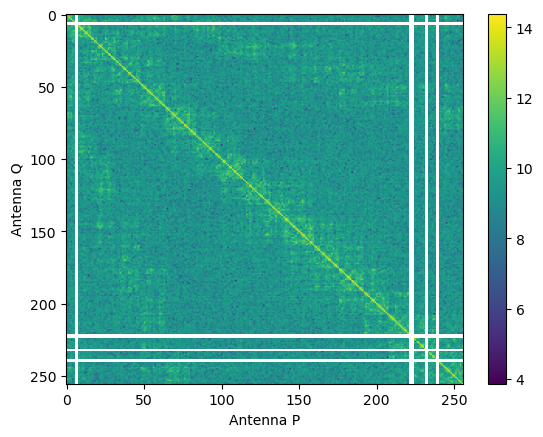

In [240]:
aavs.plot_corr_matrix()

In [286]:
%matplotlib widget

/Users/dancpr/Data/eda_post_x/ant_array2.py:213: RuntimeWarning: invalid value encountered in sqrt
  ng     = np.sqrt(1 - lg**2 - mg**2)
/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/3522198821.py:14: RuntimeWarning: invalid value encountered in log
  asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)


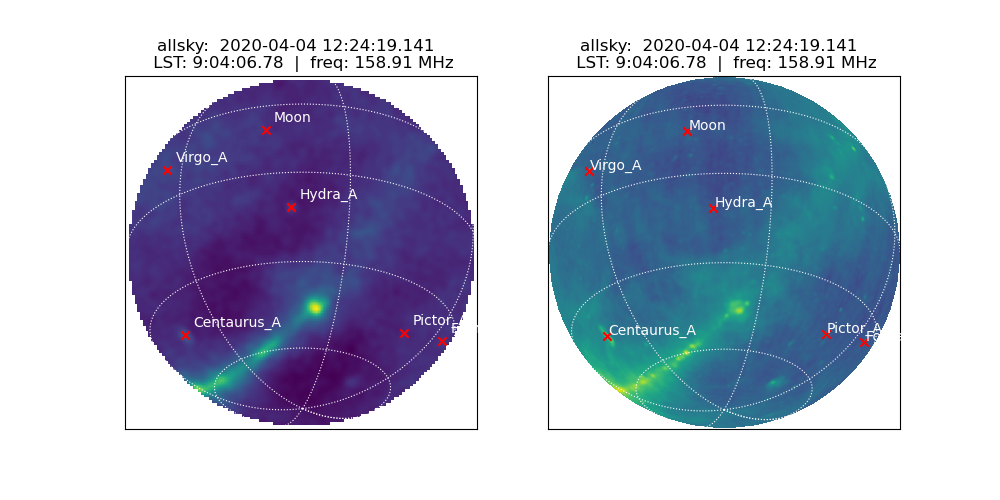

In [369]:
img = aavs.make_image()
gsm = aavs.generate_gsm()

asv = AllSkyViewer(observer=aavs, ts=t, f_mhz=f_mhz[0], n_pix=128)
skycat = generate_skycat(asv.observer)
asv.load_skycat(skycat)

plt.figure(figsize=(10, 5))
asv.plot(img, subplot_id=(1,2,1), overlay_srcs=True)


asv = AllSkyViewer(observer=aavs, ts=t, f_mhz=f_mhz[0], n_pix=800)
asv.load_skycat(skycat)
asv.plot(np.log(gsm[::-1]), subplot_id=(1,2,2), overlay_srcs=True)

In [373]:
def src_to_lmn(src, zen):

    DEC_rad = src.icrs.dec.to('rad').value
    RA_rad  = src.icrs.ra.to('rad').value

    RA_delta_rad = RA_rad - zen.ra.to('rad').value

    l = np.cos(DEC_rad) * np.sin(RA_delta_rad)
    m = (np.sin(DEC_rad) * np.cos(DEC_rad) - np.cos(DEC_rad) * np.sin(DEC_rad[0]) * np.cos(RA_delta_rad))
    n = np.sqrt(1 - l**2 - m**2)
    lmn = np.column_stack((l,m,n))
    return l,m,n

src_zen = aavs.get_zenith()
src_to_lmn(asv.skycat['Centaurus_A'], src_zen)

IndexError: invalid index to scalar variable.

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/2192487241.py:5: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hmap))


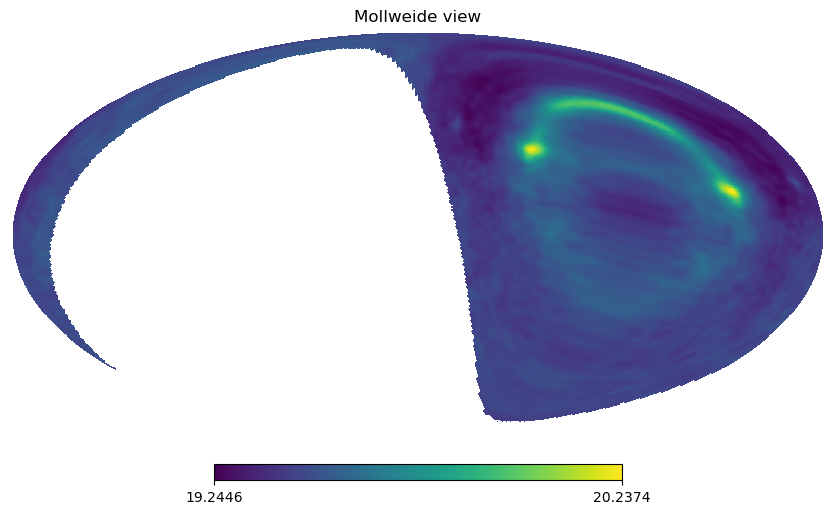

In [242]:
#aavs.workspace['c0'] = np.ones_like(aavs.workspace['c0'])
aavs.workspace['c0'] = c0

hmap = aavs.make_healpix(n_side=64, fov=np.pi/2, update=True, apply_mask=True)
hp.mollview(np.log(hmap))

masked_array(data=[39.56381611080567, 39.56381611080567,
                   37.93493428261807, ..., --, --, --],
             mask=[False, False, False, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

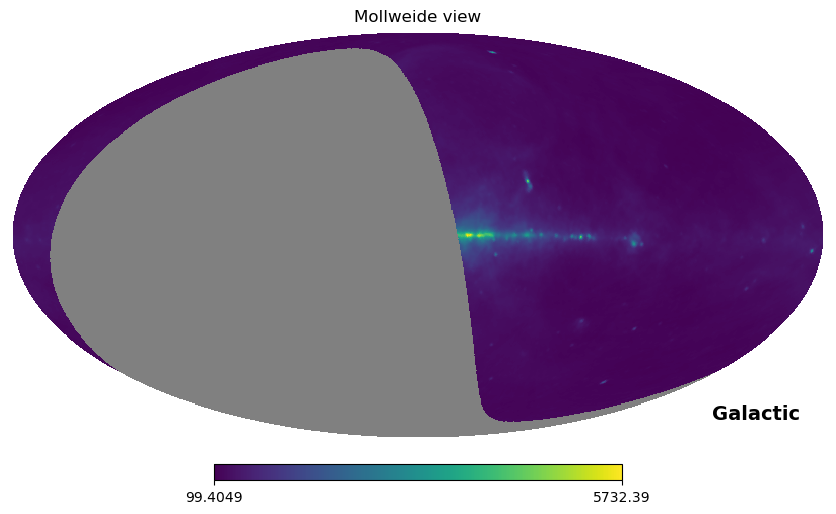

In [41]:
aavs.gsm.view_observed_gsm()

In [284]:
%matplotlib widget

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/3941110270.py:45: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hpx), coord='G')


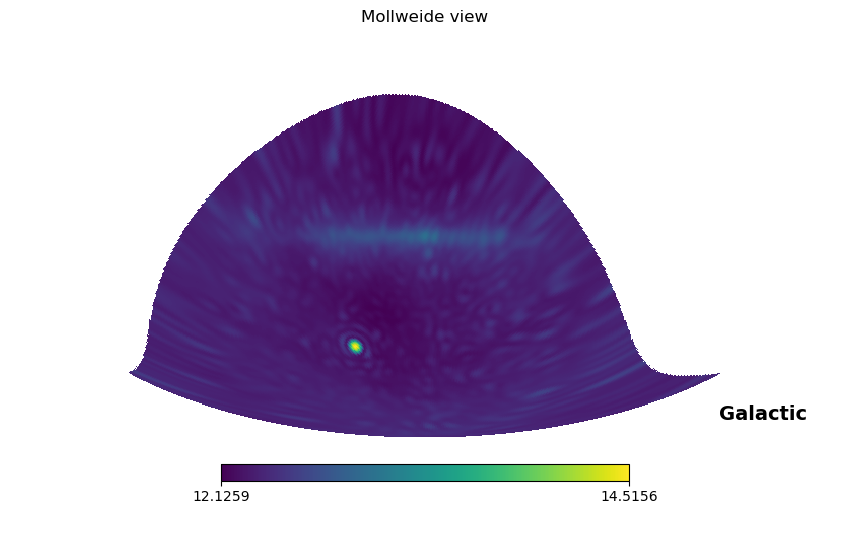

In [383]:
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
import astropy.units as u
from astropy.constants import c
SPEED_OF_LIGHT = c.value 

sc_zen = eda.get_zenith()

NSIDE = 128
NPIX  = hp.nside2npix(NSIDE)
pix0 = np.arange(NPIX)
sc =  pix2sky(NSIDE, pix0)

DEC_rad = sc.icrs.dec.to('rad').value
RA_rad  = sc.icrs.ra.to('rad').value

RA_delta_rad = RA_rad - sc_zen.icrs.ra.to('rad').value
DEC_rad_0 = sc_zen.icrs.dec.to('rad').value

l = np.cos(DEC_rad) * np.sin(RA_delta_rad)
m = (np.sin(DEC_rad) * np.cos(DEC_rad_0) - np.cos(DEC_rad) * np.sin(DEC_rad_0) * np.cos(RA_delta_rad))
n = np.sqrt(1 - l**2 - m**2)
lmn = np.column_stack((l,m,n))

#eda_loc   = EarthLocation(lat=eda.lat*u.rad, lon=eda.lon*u.rad, height=500*u.m)
#zaaz  = sc.transform_to(AltAz(obstime=t,location=eda_loc))

#x, y, z = polar_to_cartesian(zaaz.zen.to('rad').value, zaaz.az.wrap_at('180d').to('rad').value)


pix_zen = sky2pix(NSIDE, sc_zen)
vec_zen = hp.pix2vec(NSIDE, pix_zen)
pix_visible = hp.query_disc(NSIDE, vec=vec_zen, radius=np.pi/2)


#plt.plot(x[pix_visible], y[pix_visible], '.')

#lmn = np.column_stack((x,y,z))[pix_visible]

t_g = np.einsum('id,pd', lmn, eda.xyz_local, optimize=True) / SPEED_OF_LIGHT
c = phase_vector(t_g, eda.workspace['f']) * eda.workspace['c0']

B = np.abs(np.einsum('ip,pq,iq->i', c, eda.data, np.conj(c), optimize=True))
hpx = np.zeros_like(x)
hpx[pix_visible] = B[pix_visible]
hp.mollview(np.log(hpx), coord='G')

In [249]:
aavs_loc.to_geodetic()

GeodeticLocation(lon=<Longitude 116.67081389 deg>, lat=<Latitude -26.70349537 deg>, height=<Quantity 500. m>)

/var/folders/n3/pbwrsp713bd28_l4xt61c7zh0000gn/T/ipykernel_83287/2629162846.py:42: RuntimeWarning: divide by zero encountered in log
  hp.mollview(np.log(hpx))


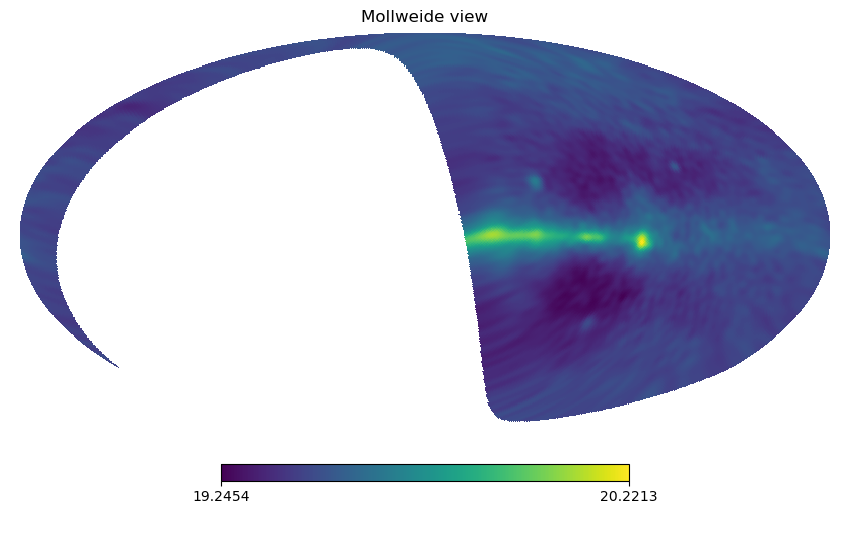

In [382]:
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
import astropy.units as u
from astropy.constants import c
SPEED_OF_LIGHT = c.value 


NSIDE = 128
NPIX  = hp.nside2npix(NSIDE)
pix0 = np.arange(NPIX)
sc =  pix2sky(NSIDE, pix0)


sc_zen = aavs.get_zenith()
pix_zen = sky2pix(NSIDE, sc_zen)
vec_zen = hp.pix2vec(NSIDE, pix_zen)
pix_visible = hp.query_disc(NSIDE, vec=vec_zen, radius=np.pi/2)


DEC_rad = sc.icrs.dec.to('rad').value
RA_rad  = sc.icrs.ra.to('rad').value

RA_rad_0 = sc_zen.ra.to('rad').value 
DEC_rad_0 = sc_zen.icrs.dec.to('rad').value

RA_delta_rad = RA_rad - RA_rad_0

l = np.cos(DEC_rad) * np.sin(RA_delta_rad)
m = (np.sin(DEC_rad) * np.cos(DEC_rad_0) - np.cos(DEC_rad) * np.sin(DEC_rad_0) * np.cos(RA_delta_rad))
n = np.sqrt(1 - l**2 - m**2)
lmn = np.column_stack((l,m,n))

#plt.plot(x[pix_visible], y[pix_visible], '.')

#lmn = np.column_stack((x,y,z))#[pix_visible]

t_g = np.einsum('id,pd', lmn, aavs.xyz_local / SPEED_OF_LIGHT, optimize=True) 
c = phase_vector(t_g, aavs.workspace['f']) * aavs.workspace['c0']

B = np.abs(np.einsum('ip,pq,iq->i', c, aavs.data, np.conj(c), optimize=True))
hpx = np.zeros_like(x)
hpx[pix_visible] = B[pix_visible]
hp.mollview(np.log(hpx))

In [345]:
sc_zen

<SkyCoord (ICRS): (ra, dec) in deg
    (135.8087835, -26.61990872)>

In [350]:
aavs.f[0]

158912036.96